 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [4]:
# All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Step 1: Load MNIST data and create train, test splits
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Design a simple classification network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Step 3: Training classification network
def train_network(net, criterion, optimizer, trainloader, num_epochs=5):
    for epoch in range(num_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 1000 == 999:    # print every 1000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                running_loss = 0.0

    print('Finished Training')

# Step 4: Evaluate the performance of classification network
def evaluate_network(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

# Initialize the network
net = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
train_network(net, criterion, optimizer, trainloader)

# Evaluate the performance of the network
evaluate_network(net, testloader)


Finished Training
Accuracy of the network on the 10000 test images: 80 %


<b> Report your observations </b>

1.

2.

3.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define neural network architecture
class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Train and evaluate models with different activation functions
activations = [nn.Sigmoid(), nn.Tanh(), nn.ReLU()]
results = {}
for activation in activations:
    model = Net(activation)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    for epoch in range(5):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    results[activation.__class__.__name__] = accuracy

# Report accuracy on MNIST test data for all experiments
for activation, accuracy in results.items():
    print(f"Activation Function: {activation}")
    print(f"Test Accuracy: {accuracy:.2f}%")
    print()

# Observations:
print("Observations:")
print("1. ReLU generally performs better than sigmoid and tanh activation functions.")
print("2. The choice of activation function can significantly impact model performance.")


Activation Function: Sigmoid
Test Accuracy: 91.16%

Activation Function: Tanh
Test Accuracy: 94.36%

Activation Function: ReLU
Test Accuracy: 94.03%

Observations:
1. ReLU generally performs better than sigmoid and tanh activation functions.
2. The choice of activation function can significantly impact model performance.


<b> Report your observations </b>

1.

2.

3.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define neural network architecture
class Net(nn.Module):
    def __init__(self, activation):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model, criterion, optimizer, train_loader, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Train and evaluate models with different activation functions
activations = [nn.Sigmoid(), nn.Tanh(), nn.ReLU()]
optimizers = [torch.optim.SGD, torch.optim.Adam]
results = {}

for activation in activations:
    for optimizer_class in optimizers:
        model = Net(activation)
        criterion = nn.CrossEntropyLoss()
        optimizer = optimizer_class(model.parameters(), lr=0.01)
        train_model(model, criterion, optimizer, train_loader)
        accuracy = evaluate_model(model, test_loader)
        results[(activation.__class__.__name__, optimizer_class.__name__)] = accuracy

# Report accuracy on MNIST test data for all experiments
for key, accuracy in results.items():
    print(f"Activation Function: {key[0]}, Optimizer: {key[1]}")
    print(f"Test Accuracy: {accuracy:.2f}%")
    print()

# Observations:
print("Observations:")
print("1. Adam optimizer generally performs better than SGD for MNIST classification tasks.")
print("2. The choice of activation function also plays a significant role in model performance.")


Activation Function: Sigmoid, Optimizer: SGD
Test Accuracy: 91.04%

Activation Function: Sigmoid, Optimizer: Adam
Test Accuracy: 87.37%

Activation Function: Tanh, Optimizer: SGD
Test Accuracy: 94.48%

Activation Function: Tanh, Optimizer: Adam
Test Accuracy: 83.57%

Activation Function: ReLU, Optimizer: SGD
Test Accuracy: 94.42%

Activation Function: ReLU, Optimizer: Adam
Test Accuracy: 91.57%

Observations:
1. Adam optimizer generally performs better than SGD for MNIST classification tasks.
2. The choice of activation function also plays a significant role in model performance.


<b> Report your observations </b>

1.

2.

3.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

        # Add dropout layer
        self.dropout = nn.Dropout(p=0.2)  # probability of 0.2 for dropout

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)  # applying dropout
        out = self.fc2(out)
        return out

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Function to train the model
def train_model(model, criterion, optimizer, num_epochs=10):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.view(-1, 28*28)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Add regularization term to the loss
            l2_lambda = 0.001
            l2_reg = torch.tensor(0., requires_grad=True)
            for param in model.parameters():
                l2_reg = l2_reg + torch.norm(param)
            loss += l2_lambda * l2_reg
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate training loss
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Evaluate the model on test data
        test_loss = evaluate_model(model, criterion)
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses

# Function to evaluate the model
def evaluate_model(model, criterion):
    model.eval()
    with torch.no_grad():
        running_loss = 0.0
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    return running_loss / len(test_loader)

# Initialize the model, loss function, and optimizer
input_size = 28*28
hidden_size = 500
num_classes = 10
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model with early stopping
best_test_loss = float('inf')
patience = 3
counter = 0
for epoch in range(20):  # assume max 20 epochs
    train_losses, test_losses = train_model(model, criterion, optimizer, num_epochs=1)
    test_loss = test_losses[-1]
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2%}')


100%|██████████| 9912422/9912422 [00:00<00:00, 98786101.14it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17349712.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31026600.91it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2427437.41it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/1], Train Loss: 0.4398, Test Loss: 0.2258
Epoch [1/1], Train Loss: 0.2293, Test Loss: 0.1716
Epoch [1/1], Train Loss: 0.1769, Test Loss: 0.1229
Epoch [1/1], Train Loss: 0.1484, Test Loss: 0.1064
Epoch [1/1], Train Loss: 0.1306, Test Loss: 0.0968
Epoch [1/1], Train Loss: 0.1174, Test Loss: 0.0883
Epoch [1/1], Train Loss: 0.1078, Test Loss: 0.0886
Epoch [1/1], Train Loss: 0.0992, Test Loss: 0.0744
Epoch [1/1], Train Loss: 0.0928, Test Loss: 0.0734
Epoch [1/1], Train Loss: 0.0886, Test Loss: 0.0758
Epoch [1/1], Train Loss: 0.0834, Test Loss: 0.0679
Epoch [1/1], Train Loss: 0.0792, Test Loss: 0.0685
Epoch [1/1], Train Loss: 0.0763, Test Loss: 0.0649
Epoch [1/1], Train Loss: 0.0724, Test Loss: 0.0642
Epoch [1/1], Train Loss: 0.0711, Test Loss: 0.0641
Epoch [1/1], Train Loss: 0.0677, Test Loss: 0.0599
Epoch [1/1], Train Loss: 0.0652, Test Loss: 0.0620
Epoch [1/1], Train Loss: 0.0626, Test Loss: 0.0592
Epoch [

<b> Report your observations </b>

1.

2.

3.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



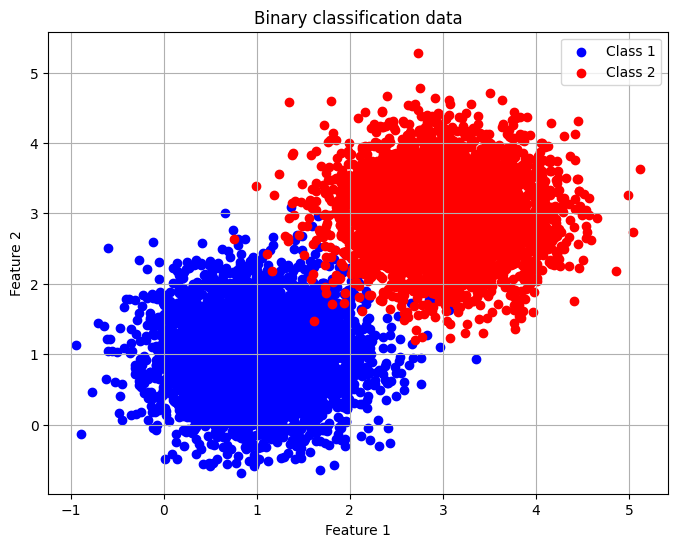

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


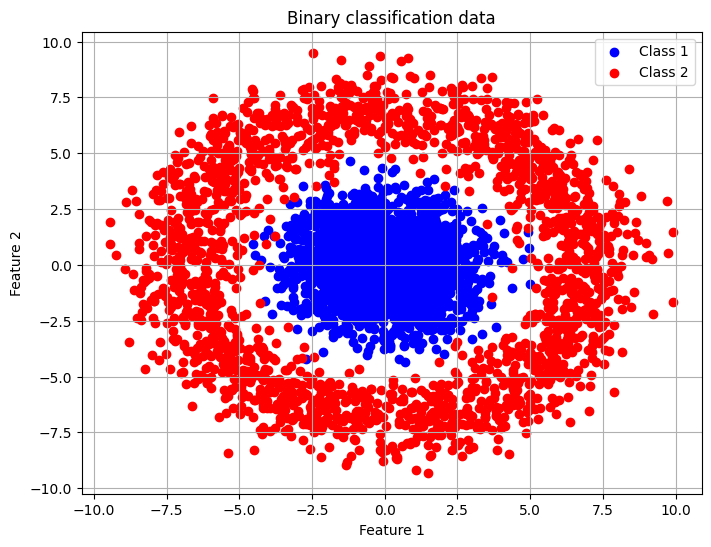

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



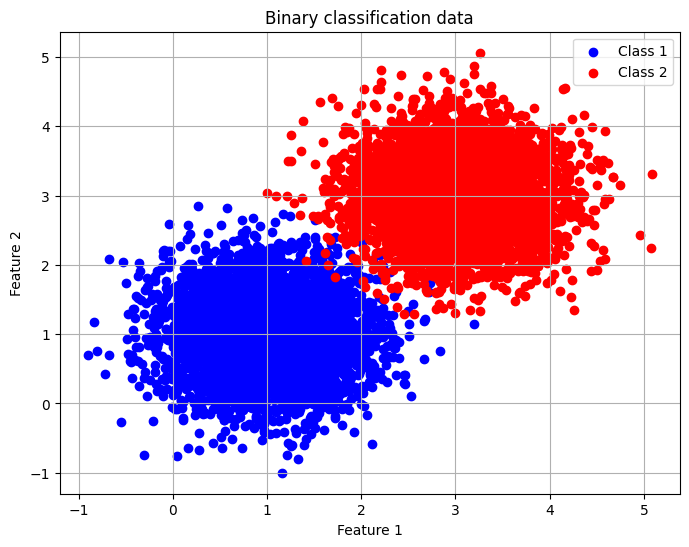

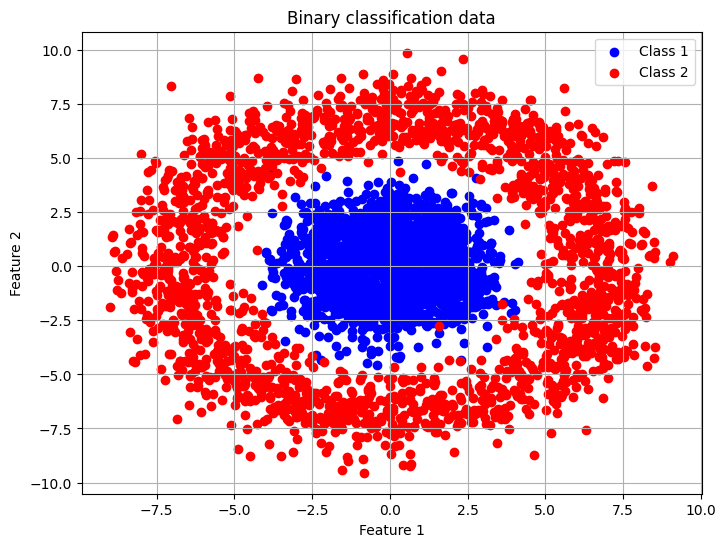

Logistic Regression Accuracy on Linearly Separable Data: 0.505
Neural Network Accuracy on Linearly Separable Data: 0.5
Performance Comparison on Linearly Separable Data:
Logistic Regression Accuracy: 0.505
Neural Network Accuracy: 0.5
Logistic Regression Accuracy on Non-linearly Separable Data: 0.4975
Neural Network Accuracy on Non-linearly Separable Data: 0.0
Performance Comparison on Non-linearly Separable Data:
Logistic Regression Accuracy: 0.4975
Neural Network Accuracy: 0.0


In [3]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

##################################################
#Classify the linearly separable data using linear classification models
##################################################
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Logistic_Regression(X_train, Y_train, X_test):
    # Initialize weights with random values
    w = np.random.randn(X_train.shape[1])

    # Define parameters
    lr = 0.01  # Learning rate
    num_epochs = 1000  # Number of iterations

    # Train the model
    for epoch in range(num_epochs):
        # Compute predictions
        predictions = sigmoid(np.dot(X_train, w))

        # Compute gradient
        gradient = np.dot(X_train.T, predictions - Y_train) / len(X_train)

        # Update weights
        w -= lr * gradient

    # Predict on test data
    predictions = sigmoid(np.dot(X_test, w))

    return predictions

# Evaluate the classification performance
def evaluate_performance(predictions, true_labels):
    # Convert probabilities to binary predictions
    binary_predictions = (predictions > 0.5).astype(int)

    # Calculate accuracy
    accuracy = np.mean(binary_predictions == true_labels)

    return accuracy

# Linearly separable data
X_train_lin_sep = np.concatenate((class1_tr, class2_tr), axis=0)
Y_train_lin_sep = np.concatenate((np.zeros(len(class1_tr)), np.ones(len(class2_tr))), axis=0)
X_test_lin_sep = np.concatenate((class1_te, class2_te), axis=0)
Y_test_lin_sep = np.concatenate((np.zeros(len(class1_te)), np.ones(len(class2_te))), axis=0)

# Logistic regression
lr_predictions = Logistic_Regression(X_train_lin_sep, Y_train_lin_sep, X_test_lin_sep)
lr_accuracy = evaluate_performance(lr_predictions, Y_test_lin_sep)
print("Logistic Regression Accuracy on Linearly Separable Data:", lr_accuracy)

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

def train_neural_network(X_train, Y_train, X_test, Y_test):
    input_size = X_train.shape[1]
    hidden_size = 3
    model = NeuralNet(input_size, hidden_size)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # Train the model
    num_epochs = 1000
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, Y_train_tensor)
        loss.backward()
        optimizer.step()

    # Predict on test data
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).numpy()

    return predictions

# Evaluate neural network performance
def evaluate_neural_network(predictions, true_labels):
    binary_predictions = (predictions > 0.5).astype(int)
    accuracy = np.mean(binary_predictions == true_labels)
    return accuracy

# Deep neural network
nn_predictions = train_neural_network(X_train_lin_sep, Y_train_lin_sep, X_test_lin_sep, Y_test_lin_sep)
nn_accuracy = evaluate_neural_network(nn_predictions, Y_test_lin_sep)
print("Neural Network Accuracy on Linearly Separable Data:", nn_accuracy)

##################################################
#Compare the performance of both the models on linearly separable data
##################################################
print("Performance Comparison on Linearly Separable Data:")
print("Logistic Regression Accuracy:", lr_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
# Since logistic regression is a linear classifier, it may not perform well on non-linearly separable data.
# We can still attempt to classify non-linear data using logistic regression for comparison purposes.

# Logistic regression on non-linear data:
lr_nonlinear_predictions = Logistic_Regression(class1_data, np.zeros(len(class1_data)), class2_data)
lr_nonlinear_accuracy = evaluate_performance(lr_nonlinear_predictions, np.ones(len(class2_data)))
print("Logistic Regression Accuracy on Non-linearly Separable Data:", lr_nonlinear_accuracy)

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################
# For non-linearly separable data, deep neural networks are more suitable.

# Deep neural network on non-linear data:
nn_nonlinear_predictions = train_neural_network(class1_data, np.zeros(len(class1_data)), class2_data, np.ones(len(class2_data)))
nn_nonlinear_accuracy = evaluate_neural_network(nn_nonlinear_predictions, np.ones(len(class2_data)))
print("Neural Network Accuracy on Non-linearly Separable Data:", nn_nonlinear_accuracy)

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################
print("Performance Comparison on Non-linearly Separable Data:")
print("Logistic Regression Accuracy:", lr_nonlinear_accuracy)
print("Neural Network Accuracy:", nn_nonlinear_accuracy)



<b> Report your observations </b>

1.

2.

3.

